In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
import os
from PIL import ImageFilter, Image 
import math
import time


In [6]:
import PySpin

In [274]:
%%time
Inorm = (I - np.min(I)) / (np.max(I) - np.min(I))
Inorm[Inorm < 0.5] = 0
sp.ndimage.center_of_mass(Inorm)

CPU times: total: 0 ns
Wall time: 6 ms


(275.5927406304428, 353.11766258859427)

In [252]:
%%time                                                                                                               
II = Image.open('D:/STUDY/Thesis & Internship/pybeamprofiler/data/img-05102023141732-21.png')
def gauss(x, A, mu, sigma, off):
    return A * np.exp(-(x-mu)**2 / (2 * sigma**2)) + off

ppmm = 1/0.0069  # pixels per mm to convert position to mm
#reduce rez to clear heigh freq.
II = II.resize([round(II.width / 10), round(II.height / 10)])
II = II.resize([round(II.width*10), round(II.height*10)])
# change the image to a matrix 
I=np.asarray(II)

I=I/np.amax(I) # normalize the matrix

# the elliptic shape of the beam is extracted on the form of points on a certain intensity of the gaussian beam
yx_coords = np.column_stack(np.where((I >= 0.6 ) & (I <= 0.606)))

# the center of this ellipse is in the middle between the max Y and min Y and max X and min X 
Y_max=((np.amax(yx_coords[:,0])+np.amin(yx_coords[:,0]))/2)
X_max=((np.amax(yx_coords[:,1])+np.amin(yx_coords[:,1]))/2)

# the axis is set at the furthest point from the center
d_from_center=(yx_coords[:,1]-X_max)**2+(yx_coords[:,0]-Y_max)**2
P_axis=np.where(d_from_center==np.amax(d_from_center))
P_axis=yx_coords[P_axis[0]]
m=(P_axis[0][0]-Y_max)/(P_axis[0][1]-X_max) # the slope of the axis
X_axis=np.linspace(200, 300, num=200)
Y_axis=(m)*(X-X_max)+Y_max

II=II.crop(((round(X_max)-250),(round(Y_max)-355),(round(X_max)+250),(round(Y_max)+355)))
II=II.rotate((math.atan(m)*180/math.pi)+90)


sum_rows = np.mean(II, axis=0)   #get array with the sums of the rows
sum_col = np.mean(II, axis=1) #get array with the sums of the columns

x_col=np.linspace(0, II.height-1, num=II.height)/ppmm # dim in mm
x_rows=np.linspace(0, II.width-1, num=II.width)/ppmm # dim in mm

popt1,pcov1 = curve_fit(gauss, x_rows,  sum_rows)

popt2,pcov2 = curve_fit(gauss, x_col,  sum_col)

pos2 = popt2[1]
std2 = popt2[2]

CPU times: total: 15.6 ms
Wall time: 23.8 ms


In [259]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


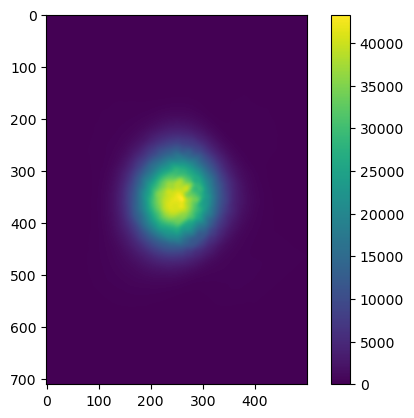

In [253]:
plt.figure()
plt.imshow(np.asarray(II))
plt.colorbar()
#plt.scatter(yx_coords[:,1],yx_coords[:,0], c='w')
#plt.scatter(X_max,Y_max, c='b')
#plt.plot(X_axis,Y_axis, c='g')
plt.show()

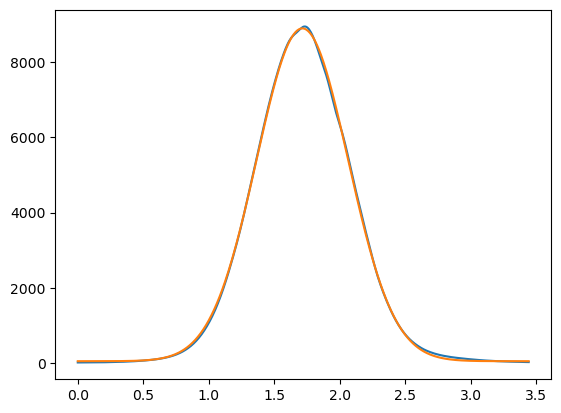

In [254]:
plt.figure()
plt.plot(x_rows,sum_rows)
plt.plot(x_rows,gauss(x_rows, *popt1))
plt.show()

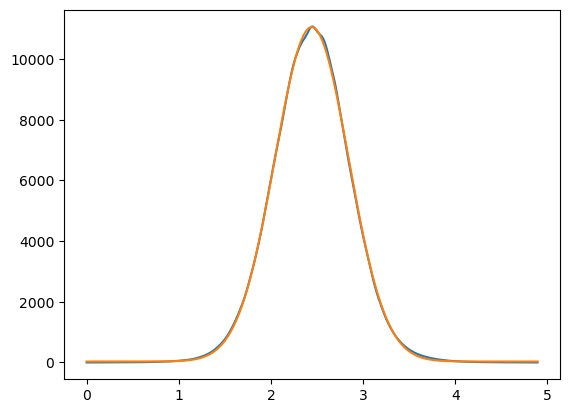

In [255]:
plt.figure()
plt.plot(x_col,sum_col)
plt.plot(x_col,gauss(x_col, *popt2))
plt.show()

In [237]:
print(popt2)
print(popt1)

[ 1.44394357e+04  2.43817746e+00 -4.03205907e-01  4.50942272e+00]
[1.15648214e+04 1.71807869e+00 3.52936465e-01 1.78805596e+01]


In [243]:
print(popt2)
print(popt1)

[1.10232929e+04 2.44234088e+00 4.00055591e-01 3.26964837e+01]
[ 8.86017169e+03  1.71494371e+00 -3.48913574e-01  4.29792384e+01]


In [257]:
import Pyspin

ModuleNotFoundError: No module named 'Pyspin'